In [155]:
#Import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.cluster import KMeans
from scipy.cluster.vq import kmeans,vq
%matplotlib inline

In [156]:
#Read the dataset 
stock_prices = pd.read_csv('data_stocks.csv')
stock_prices.head()

DATE      SP500  NASDAQ.AAL  NASDAQ.AAPL  NASDAQ.ADBE  NASDAQ.ADI  \
0  1491226200  2363.6101     42.3300     143.6800     129.6300      82.040   
1  1491226260  2364.1001     42.3600     143.7000     130.3200      82.080   
2  1491226320  2362.6799     42.3100     143.6901     130.2250      82.030   
3  1491226380  2364.3101     42.3700     143.6400     130.0729      82.000   
4  1491226440  2364.8501     42.5378     143.6600     129.8800      82.035   

   NASDAQ.ADP  NASDAQ.ADSK  NASDAQ.AKAM  NASDAQ.ALXN    ...     NYSE.WYN  \
0    102.2300      85.2200       59.760       121.52    ...       84.370   
1    102.1400      85.6500       59.840       121.48    ...       84.370   
2    102.2125      85.5100       59.795       121.93    ...       84.585   
3    102.1400      85.4872       59.620       121.44    ...       84.460   
4    102.0600      85.7001       59.620       121.60    ...       84.470   

   NYSE.XEC  NYSE.XEL  NYSE.XL  NYSE.XOM  NYSE.XRX  NYSE.XYL  NYSE.YUM  \
0   119.035     44.40    39.88     82.03      7.36     50.22     63.86   
1   119.035     44.11    39.88     82.03      7.38     50.22     63.74   
2   119.260     44.09    39.98     82.02      7.36     50.12     63.75   
3   119.260     44.25    39.99     82.02      7.35     50.16     63.88   
4   119.610     44.11    39.96     82.03      7.36     50.20     63.91   

   NYSE.ZBH  NYSE.ZTS  
0   122.000    53.350  
1   121.770    53.350  
2   121.700    53.365  
3   121.700    53.380  
4   121.695    53.240  

[5 rows x 502 columns]

In [157]:
#Check the datatypes on the columns
print(stock_prices.dtypes)

DATE              int64
SP500           float64
NASDAQ.AAL      float64
NASDAQ.AAPL     float64
NASDAQ.ADBE     float64
NASDAQ.ADI      float64
NASDAQ.ADP      float64
NASDAQ.ADSK     float64
NASDAQ.AKAM     float64
NASDAQ.ALXN     float64
NASDAQ.AMAT     float64
NASDAQ.AMD      float64
NASDAQ.AMGN     float64
NASDAQ.AMZN     float64
NASDAQ.ATVI     float64
NASDAQ.AVGO     float64
NASDAQ.BBBY     float64
NASDAQ.BIIB     float64
NASDAQ.CA       float64
NASDAQ.CBOE     float64
NASDAQ.CELG     float64
NASDAQ.CERN     float64
NASDAQ.CHRW     float64
NASDAQ.CHTR     float64
NASDAQ.CINF     float64
NASDAQ.CMCSA    float64
NASDAQ.CME      float64
NASDAQ.COST     float64
NASDAQ.CSCO     float64
NASDAQ.CSX      float64
                 ...   
NYSE.USB        float64
NYSE.UTX        float64
NYSE.V          float64
NYSE.VAR        float64
NYSE.VFC        float64
NYSE.VLO        float64
NYSE.VMC        float64
NYSE.VNO        float64
NYSE.VTR        float64
NYSE.VZ         float64
NYSE.WAT        

In [158]:
#Check for missing values
stock_prices.isnull().sum()

DATE            0
SP500           0
NASDAQ.AAL      0
NASDAQ.AAPL     0
NASDAQ.ADBE     0
NASDAQ.ADI      0
NASDAQ.ADP      0
NASDAQ.ADSK     0
NASDAQ.AKAM     0
NASDAQ.ALXN     0
NASDAQ.AMAT     0
NASDAQ.AMD      0
NASDAQ.AMGN     0
NASDAQ.AMZN     0
NASDAQ.ATVI     0
NASDAQ.AVGO     0
NASDAQ.BBBY     0
NASDAQ.BIIB     0
NASDAQ.CA       0
NASDAQ.CBOE     0
NASDAQ.CELG     0
NASDAQ.CERN     0
NASDAQ.CHRW     0
NASDAQ.CHTR     0
NASDAQ.CINF     0
NASDAQ.CMCSA    0
NASDAQ.CME      0
NASDAQ.COST     0
NASDAQ.CSCO     0
NASDAQ.CSX      0
               ..
NYSE.USB        0
NYSE.UTX        0
NYSE.V          0
NYSE.VAR        0
NYSE.VFC        0
NYSE.VLO        0
NYSE.VMC        0
NYSE.VNO        0
NYSE.VTR        0
NYSE.VZ         0
NYSE.WAT        0
NYSE.WEC        0
NYSE.WFC        0
NYSE.WHR        0
NYSE.WM         0
NYSE.WMB        0
NYSE.WMT        0
NYSE.WRK        0
NYSE.WU         0
NYSE.WY         0
NYSE.WYN        0
NYSE.XEC        0
NYSE.XEL        0
NYSE.XL         0
NYSE.XOM  

In [159]:
#Problem Statement 1: 
#There are various stocks for which we have collected a data set, which all stocks are apparently similar in performance
#Drop the date and SP500 columns before calculating the returns on stock
stock_prices.drop(['DATE', 'SP500'], axis = 1, inplace = True)

In [160]:
#Calculate the yearly returns for each stock
returns = stock_prices.pct_change().mean()*252

In [161]:
#Create a new dataframe having the column as returns
returns = pd.DataFrame(returns)
returns.columns = ['Returns']
returns.head()

Returns
NASDAQ.AAL   0.000441
NASDAQ.AAPL  0.000855
NASDAQ.ADBE  0.001144
NASDAQ.ADI   0.000198
NASDAQ.ADP   0.000310

In [162]:
#Calculate the volatility for the stock
returns['Volatility'] = stock_prices.pct_change().std() * math.sqrt(252)

In [163]:
#Format the data as a numpy array to feed into the K-Means algorithm
data = np.asarray([np.asarray(returns['Returns']),np.asarray(returns['Volatility'])]).T

Text(0.5,1,'Elbow curve')

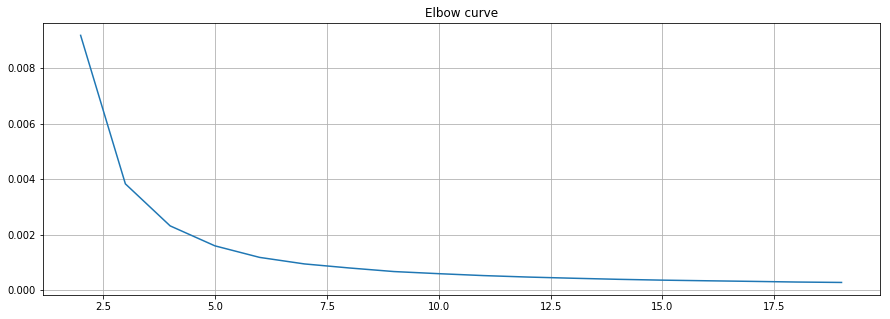

In [164]:
#Identify the no. of clusters to be used for k-means clustering using Elbow curve
X = data
distorsions = []
for k in range(2, 20):
    k_means = KMeans(n_clusters=k)
    k_means.fit(X)
    distorsions.append(k_means.inertia_)
 
fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 20), distorsions)
plt.grid(True)
plt.title('Elbow curve')

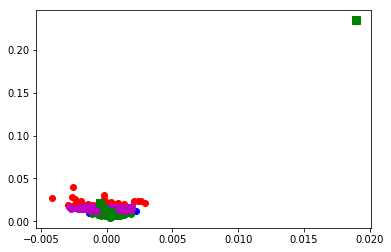

In [165]:
#From above graph, it is evident that we should use no. of clusters = 5
centroids,_ = kmeans(data,5)
#Assign each sample to a cluster
idx,_ = vq(data,centroids)
 
#Plot using numpy's logical indexing
plt.plot(data[idx==0,0],data[idx==0,1],'ob',
     data[idx==1,0],data[idx==1,1],'oy',
     data[idx==2,0],data[idx==2,1],'or',
     data[idx==3,0],data[idx==3,1],'og',
     data[idx==4,0],data[idx==4,1],'om')
plt.plot(centroids[:,0],centroids[:,1],'sg',markersize=8)
plt.show()

In [166]:
#Identify the outlier from the data
print(returns.idxmax())

Returns       NYSE.XRX
Volatility    NYSE.XRX
dtype: object


In [167]:
#Drop the relevant stock that is outlier from our data
returns.drop('NYSE.XRX', inplace=True)
stock_prices.drop('NYSE.XRX', axis = 1, inplace=True)
#Recreate data to feed into the algorithm
data = np.asarray([np.asarray(returns['Returns']),np.asarray(returns['Volatility'])]).T

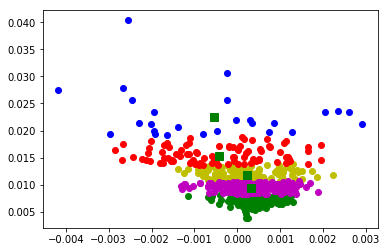

In [168]:
centroids,_ = kmeans(data,5)
# assign each sample to a cluster
idx,_ = vq(data,centroids)
 
#Plot using numpy's logical indexing
plt.plot(data[idx==0,0],data[idx==0,1],'ob',
     data[idx==1,0],data[idx==1,1],'oy',
     data[idx==2,0],data[idx==2,1],'or',
     data[idx==3,0],data[idx==3,1],'og',
     data[idx==4,0],data[idx==4,1],'om')
plt.plot(centroids[:,0],centroids[:,1],'sg',markersize=8)
plt.show()

In [169]:
#Get the cluster and name details
details = [(name,cluster) for name, cluster in zip(returns.index,idx)]

In [170]:
#Create a new dataframe having the stock name and the cluster that it belongs to
output = pd.DataFrame(details, columns=['Name', 'Cluster'])
output.head()

Name  Cluster
0   NASDAQ.AAL        2
1  NASDAQ.AAPL        4
2  NASDAQ.ADBE        4
3   NASDAQ.ADI        1
4   NASDAQ.ADP        1

In [171]:
#Group the stocks that are in the same cluster.
grouped = output.groupby('Cluster')

In [172]:
#Print the groups of stocks which are similar in performance
list1 = []
for cluster,group in grouped:
    print("Stocks similar in performance in Group: ",cluster)
    list1 = (group['Name'].tolist())
    print(list1) 

Stocks similar in performance in Group:  0
['NASDAQ.AMD', 'NASDAQ.INCY', 'NASDAQ.NVDA', 'NASDAQ.NWS', 'NASDAQ.STX', 'NASDAQ.VRTX', 'NASDAQ.WFM', 'NYSE.AAP', 'NYSE.AYI', 'NYSE.BHI', 'NYSE.BLL', 'NYSE.CHK', 'NYSE.FCX', 'NYSE.FL', 'NYSE.JWN', 'NYSE.KORS', 'NYSE.KR', 'NYSE.LB', 'NYSE.MRO', 'NYSE.NFX', 'NYSE.NRG', 'NYSE.PRGO', 'NYSE.RIG', 'NYSE.RRC', 'NYSE.SIG', 'NYSE.SYF']
Stocks similar in performance in Group:  1
['NASDAQ.ADI', 'NASDAQ.ADP', 'NASDAQ.AMAT', 'NASDAQ.ATVI', 'NASDAQ.AVGO', 'NASDAQ.BIIB', 'NASDAQ.CHRW', 'NASDAQ.CSX', 'NASDAQ.CTXS', 'NASDAQ.DISH', 'NASDAQ.EQIX', 'NASDAQ.ETFC', 'NASDAQ.EXPE', 'NASDAQ.FITB', 'NASDAQ.FLIR', 'NASDAQ.FOX', 'NASDAQ.FOXA', 'NASDAQ.HAS', 'NASDAQ.HBAN', 'NASDAQ.HOLX', 'NASDAQ.HSIC', 'NASDAQ.IDXX', 'NASDAQ.INTU', 'NASDAQ.JBHT', 'NASDAQ.KLAC', 'NASDAQ.LKQ', 'NASDAQ.MCHP', 'NASDAQ.NTAP', 'NASDAQ.NTRS', 'NASDAQ.NWSA', 'NASDAQ.PCAR', 'NASDAQ.PCLN', 'NASDAQ.PYPL', 'NASDAQ.ROST', 'NASDAQ.SRCL', 'NASDAQ.SWKS', 'NASDAQ.SYMC', 'NASDAQ.XLNX', 'NASDAQ.XRAY', 'NASD

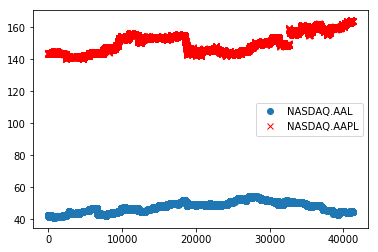

In [174]:
#Problem Statement 2: How many Unique patterns that exist in the historical stock data set, based on fluctuations in price.
#Plot the prices for two stocks. The plot shows that they are not moving together
stock_prices[['NASDAQ.AAL','NASDAQ.AAPL']].plot(style=['o','rx'])

In [175]:
#Find the change in price
stock_return = stock_prices.apply(lambda x: x / x[0])
stock_return.head()

NASDAQ.AAL  NASDAQ.AAPL  NASDAQ.ADBE  NASDAQ.ADI  NASDAQ.ADP  NASDAQ.ADSK  \
0    1.000000     1.000000     1.000000    1.000000    1.000000     1.000000   
1    1.000709     1.000139     1.005323    1.000488    0.999120     1.005046   
2    0.999528     1.000070     1.004590    0.999878    0.999829     1.003403   
3    1.000945     0.999722     1.003417    0.999512    0.999120     1.003135   
4    1.004909     0.999861     1.001929    0.999939    0.998337     1.005634   

   NASDAQ.AKAM  NASDAQ.ALXN  NASDAQ.AMAT  NASDAQ.AMD    ...      NYSE.WY  \
0     1.000000     1.000000     1.000000    1.000000    ...     1.000000   
1     1.001339     0.999671     1.000513    1.006845    ...     1.002059   
2     1.000586     1.003374     0.997948    1.002053    ...     1.003235   
3     0.997657     0.999342     0.996153    1.001369    ...     0.999118   
4     0.997657     1.000658     0.998461    1.004107    ...     1.000000   

   NYSE.WYN  NYSE.XEC  NYSE.XEL   NYSE.XL  NYSE.XOM  NYSE.XYL  NYSE.YUM  \
0  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1  1.000000  1.000000  0.993468  1.000000  1.000000  1.000000  0.998121   
2  1.002548  1.001890  0.993018  1.002508  0.999878  0.998009  0.998277   
3  1.001067  1.001890  0.996622  1.002758  0.999878  0.998805  1.000313   
4  1.001185  1.004831  0.993468  1.002006  1.000000  0.999602  1.000783   

   NYSE.ZBH  NYSE.ZTS  
0  1.000000  1.000000  
1  0.998115  1.000000  
2  0.997541  1.000281  
3  0.997541  1.000562  
4  0.997500  0.997938  

[5 rows x 499 columns]

In [179]:
#Transpose the data frame so that clustering can be done for stocks
stock_return_T = stock_return.T
stock_return_T.head()

0         1         2         3         4         5      \
NASDAQ.AAL     1.0  1.000709  0.999528  1.000945  1.004909  1.004959   
NASDAQ.AAPL    1.0  1.000139  1.000070  0.999722  0.999861  1.000696   
NASDAQ.ADBE    1.0  1.005323  1.004590  1.003417  1.001929  1.003394   
NASDAQ.ADI     1.0  1.000488  0.999878  0.999512  0.999939  1.000000   
NASDAQ.ADP     1.0  0.999120  0.999829  0.999120  0.998337  0.998141   

                6         7         8         9        ...        41256  \
NASDAQ.AAL   1.003307  1.003307  1.001417  1.000000    ...     1.056461   
NASDAQ.AAPL  1.001281  1.000905  1.000940  1.000835    ...     1.142539   
NASDAQ.ADBE  1.004243  1.003934  1.003626  1.004474    ...     1.196174   
NASDAQ.ADI   1.000975  1.001828  1.002316  1.001524    ...     1.020356   
NASDAQ.ADP   1.000978  1.001369  1.001467  1.000978    ...     1.042942   

                41257     41258     41259     41260     41261     41262  \
NASDAQ.AAL   1.056697  1.057406  1.057170  1.056225  1.056461  1.056697   
NASDAQ.AAPL  1.141843  1.142748  1.142817  1.142400  1.142191  1.142261   
NASDAQ.ADBE  1.195788  1.196637  1.196405  1.196019  1.196405  1.196945   
NASDAQ.ADI   1.020234  1.019381  1.020112  1.019746  1.019868  1.019625   
NASDAQ.ADP   1.042355  1.042942  1.042747  1.043040  1.042404  1.042649   

                41263     41264     41265  
NASDAQ.AAL   1.056934  1.056225  1.056934  
NASDAQ.AAPL  1.141495  1.140590  1.141286  
NASDAQ.ADBE  1.196212  1.195402  1.196945  
NASDAQ.ADI   1.019259  1.018771  1.020112  
NASDAQ.ADP   1.041964  1.040790  1.041475  

[5 rows x 41266 columns]

Text(0.5,1,'Elbow curve')

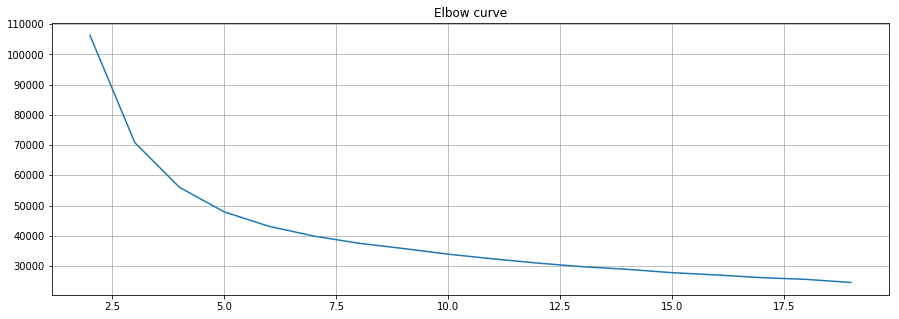

In [178]:
#Identify the no. of clusters to be used for k-means clustering using Elbow curve
X = stock_return_T
distorsions = []
for k in range(2, 20):
    k_means = KMeans(n_clusters=k)
    k_means.fit(X)
    distorsions.append(k_means.inertia_)
 
fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 20), distorsions)
plt.grid(True)
plt.title('Elbow curve')

In [180]:
#From the above curve, it's evident that we should use no. of clusters = 5
kmeans = KMeans(n_clusters=5, random_state=0).fit(stock_return_T)
labels = kmeans.labels_

In [181]:
#Associate the clusters and the stock name as columns within dataframe
stock_return_T['clusters'] = labels
stock_return_T['Name']= stock_return_T.index
stock_return_T.head()

0         1         2         3         4         5         6  \
NASDAQ.AAL   1.0  1.000709  0.999528  1.000945  1.004909  1.004959  1.003307   
NASDAQ.AAPL  1.0  1.000139  1.000070  0.999722  0.999861  1.000696  1.001281   
NASDAQ.ADBE  1.0  1.005323  1.004590  1.003417  1.001929  1.003394  1.004243   
NASDAQ.ADI   1.0  1.000488  0.999878  0.999512  0.999939  1.000000  1.000975   
NASDAQ.ADP   1.0  0.999120  0.999829  0.999120  0.998337  0.998141  1.000978   

                    7         8         9     ...          41258     41259  \
NASDAQ.AAL   1.003307  1.001417  1.000000     ...       1.057406  1.057170   
NASDAQ.AAPL  1.000905  1.000940  1.000835     ...       1.142748  1.142817   
NASDAQ.ADBE  1.003934  1.003626  1.004474     ...       1.196637  1.196405   
NASDAQ.ADI   1.001828  1.002316  1.001524     ...       1.019381  1.020112   
NASDAQ.ADP   1.001369  1.001467  1.000978     ...       1.042942  1.042747   

                41260     41261     41262     41263     41264     41265  \
NASDAQ.AAL   1.056225  1.056461  1.056697  1.056934  1.056225  1.056934   
NASDAQ.AAPL  1.142400  1.142191  1.142261  1.141495  1.140590  1.141286   
NASDAQ.ADBE  1.196019  1.196405  1.196945  1.196212  1.195402  1.196945   
NASDAQ.ADI   1.019746  1.019868  1.019625  1.019259  1.018771  1.020112   
NASDAQ.ADP   1.043040  1.042404  1.042649  1.041964  1.040790  1.041475   

             clusters         Name  
NASDAQ.AAL          4   NASDAQ.AAL  
NASDAQ.AAPL         0  NASDAQ.AAPL  
NASDAQ.ADBE         4  NASDAQ.ADBE  
NASDAQ.ADI          3   NASDAQ.ADI  
NASDAQ.ADP          0   NASDAQ.ADP  

[5 rows x 41268 columns]

In [182]:
#Group the stocks by clusters
grouped = stock_return_T[['Name', 'clusters']].groupby(['clusters'])

In [183]:
#Identify the stocks in each cluster
group1 = grouped['Name'].get_group(0)
group2 = grouped['Name'].get_group(1)
group3 = grouped['Name'].get_group(2)
group4 = grouped['Name'].get_group(3)
group5 = grouped['Name'].get_group(4)

Pattern 1 that exists in historical dataset based on fluctuation in price


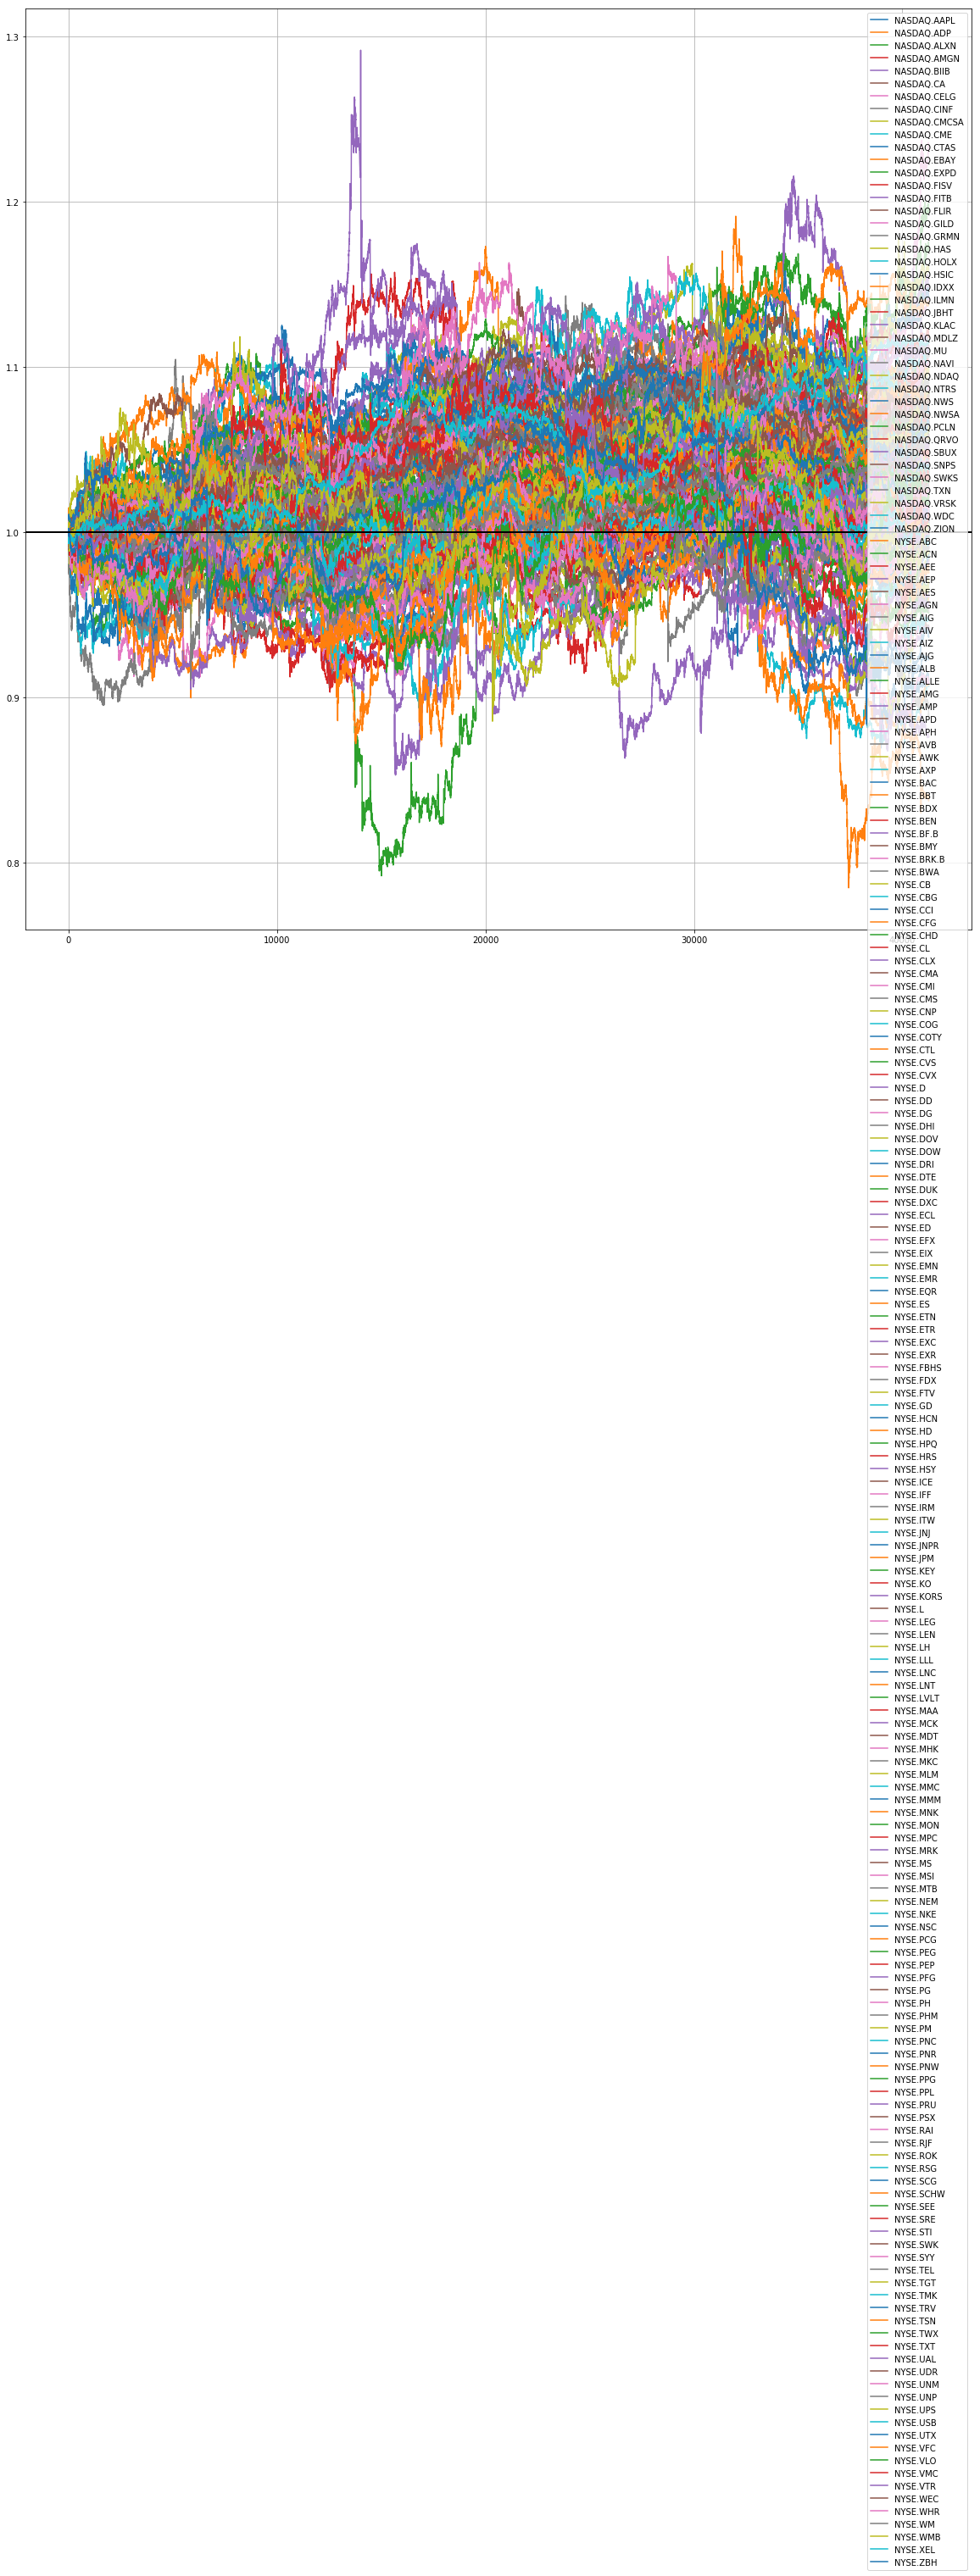

In [184]:
#A constant trend - neither upward nor downward is seen
print("Pattern 1 that exists in historical dataset based on fluctuation in price")
stock_return[group1.tolist()].plot(grid = True, figsize = (20, 20)).axhline(y = 1, color = "black", lw = 2)
plt.show()

Pattern 2 that exists in historical dataset based on fluctuation in price


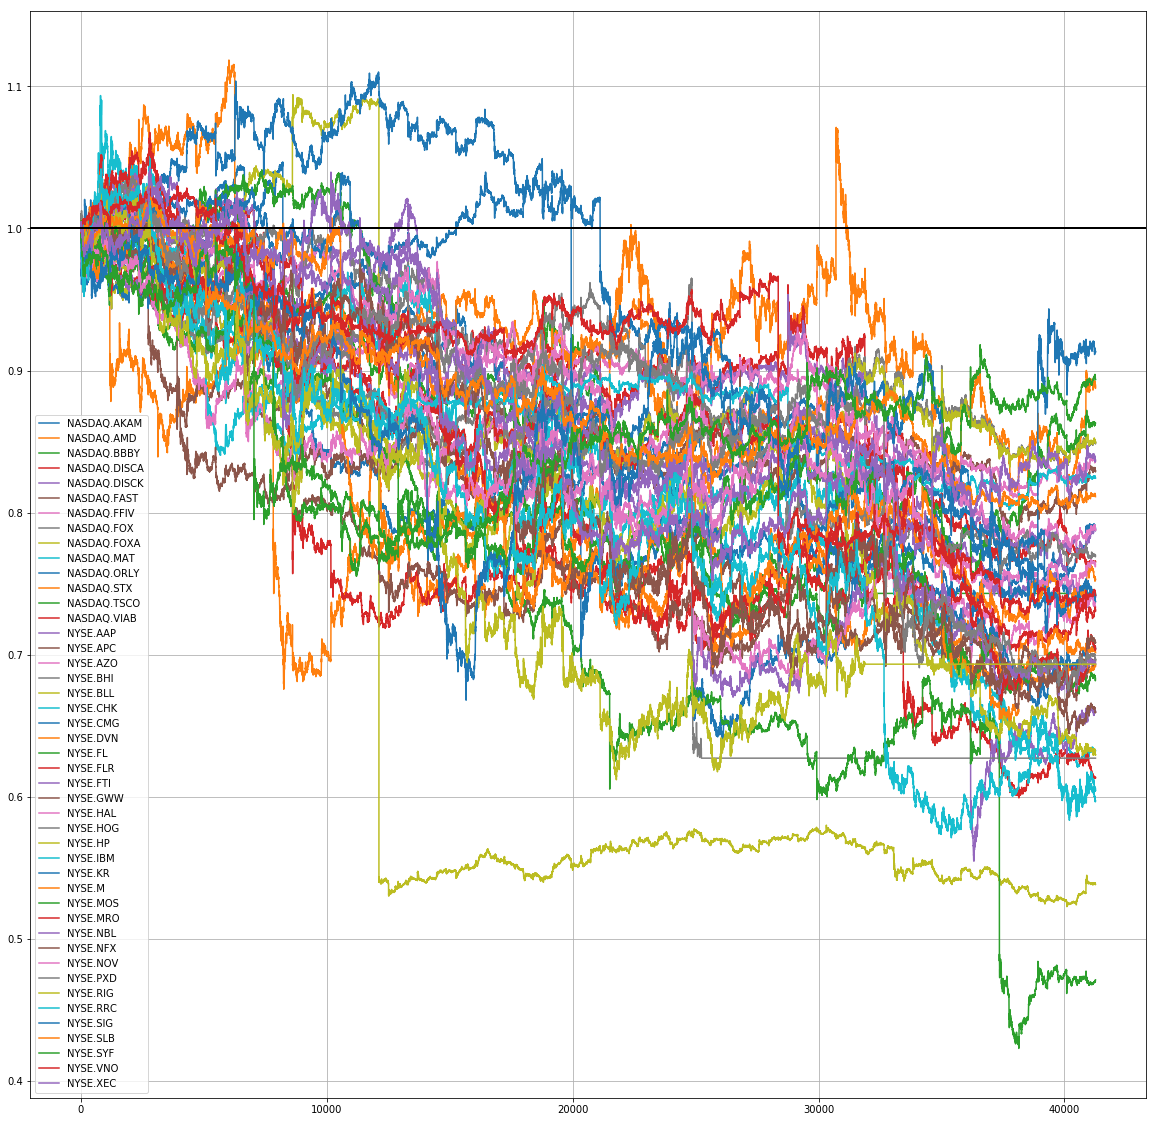

In [185]:
#A downward trend is seen
print("Pattern 2 that exists in historical dataset based on fluctuation in price")
stock_return[group2.tolist()].plot(grid = True, figsize = (20, 20)).axhline(y = 1, color = "black", lw = 2)
plt.show()

Pattern 3 that exists in historical dataset based on fluctuation in price


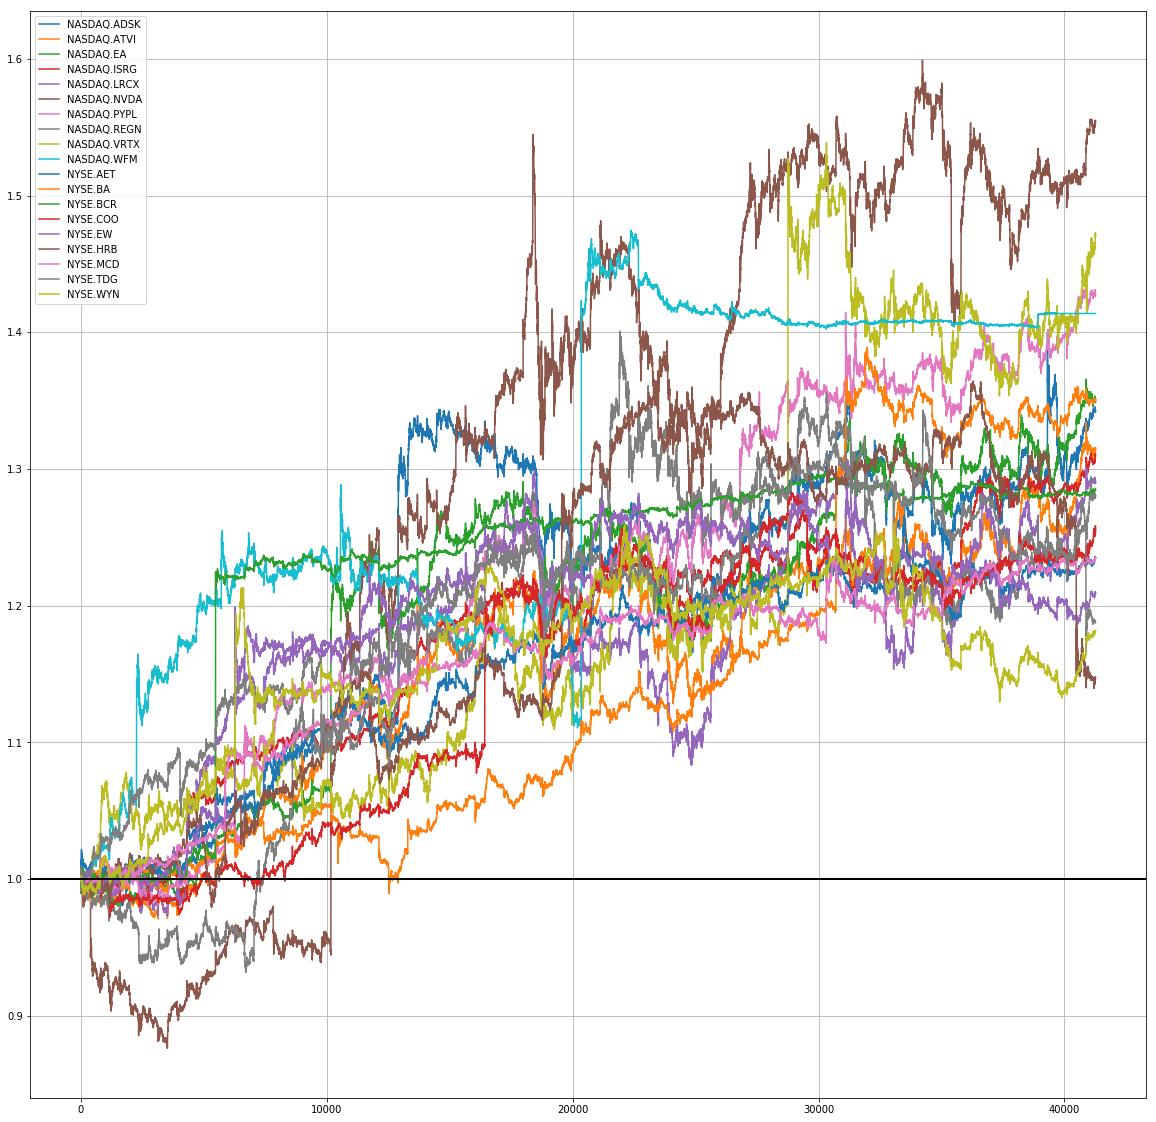

In [186]:
#A high upward trend can be seen
print("Pattern 3 that exists in historical dataset based on fluctuation in price")
stock_return[group3.tolist()].plot(grid = True, figsize = (20, 20)).axhline(y = 1, color = "black", lw = 2)
plt.show()

Pattern 4 that exists in historical dataset based on fluctuation in price


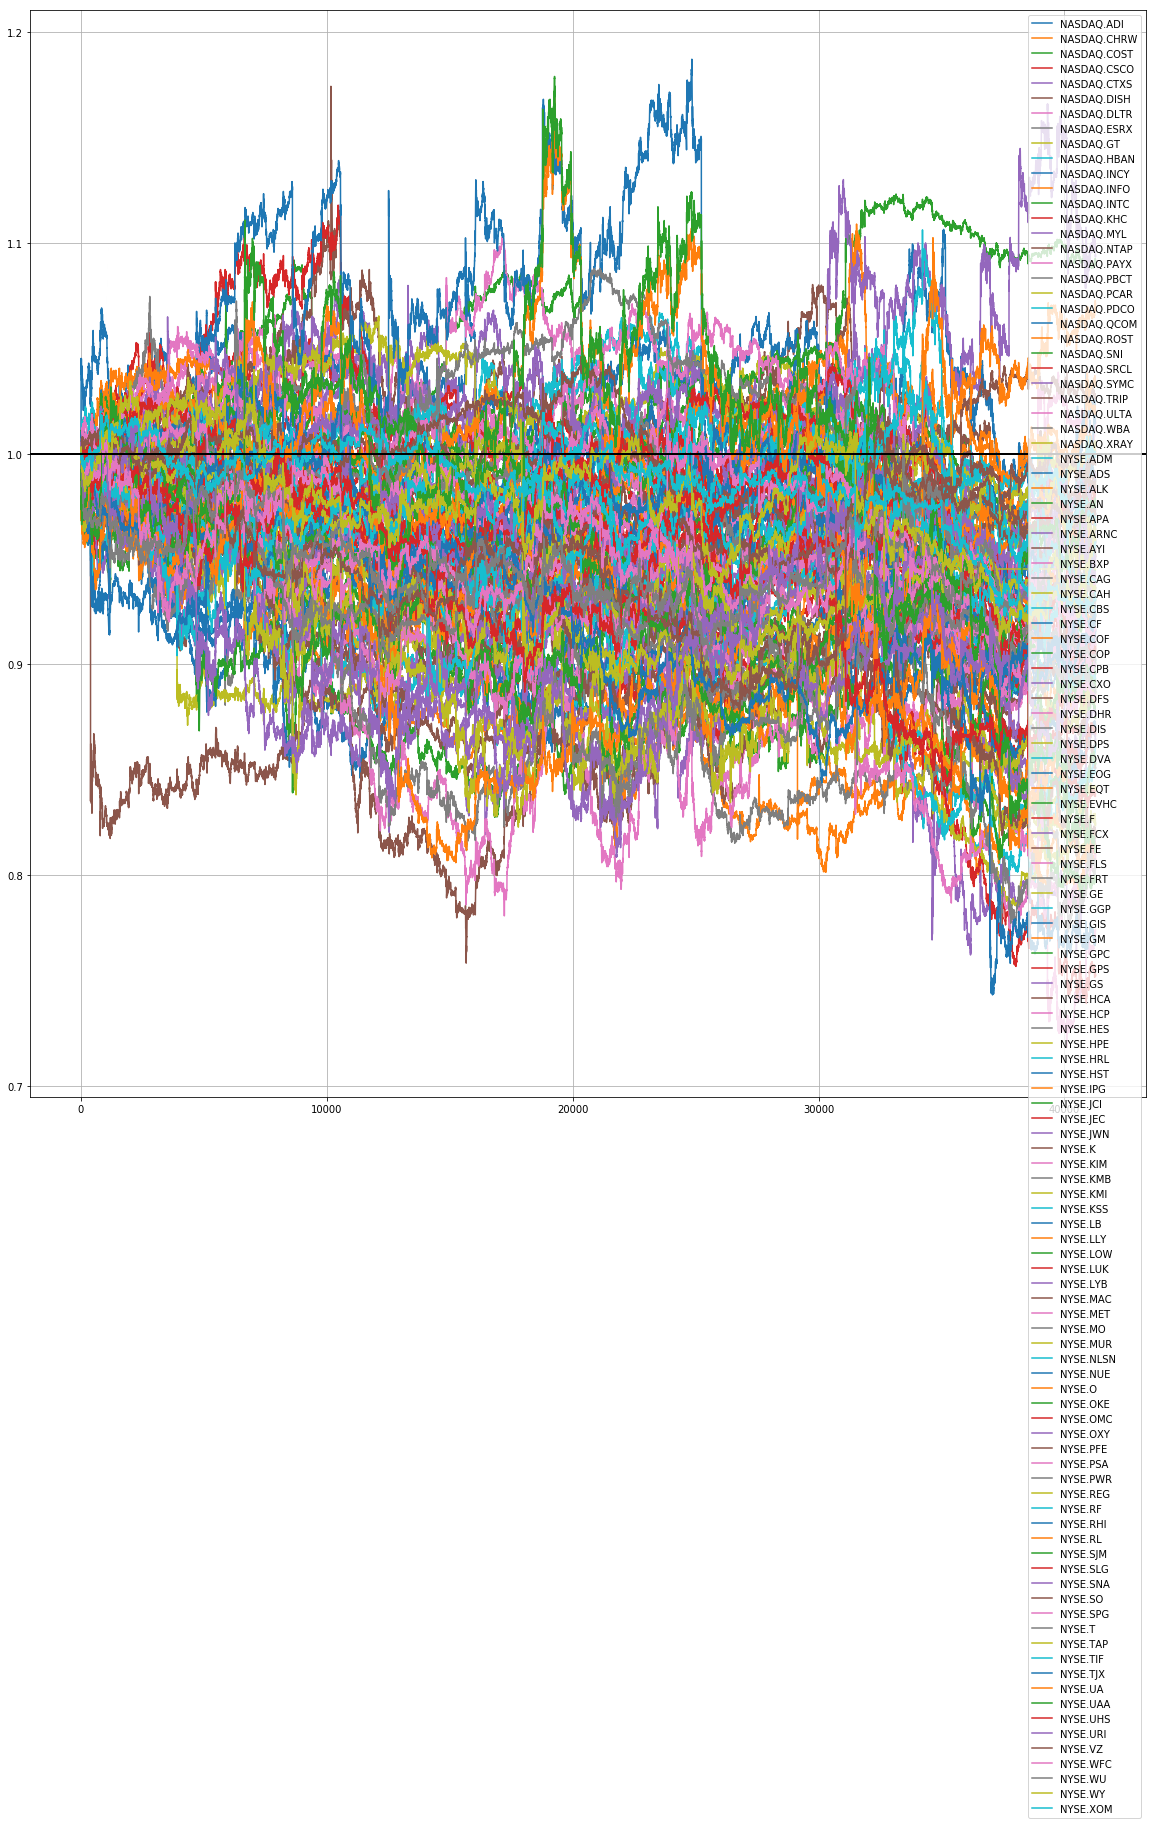

In [187]:
print("Pattern 4 that exists in historical dataset based on fluctuation in price")
stock_return[group4.tolist()].plot(grid = True, figsize = (20, 20)).axhline(y = 1, color = "black", lw = 2)
plt.show()

Pattern 5 that exists in historical dataset based on fluctuation in price


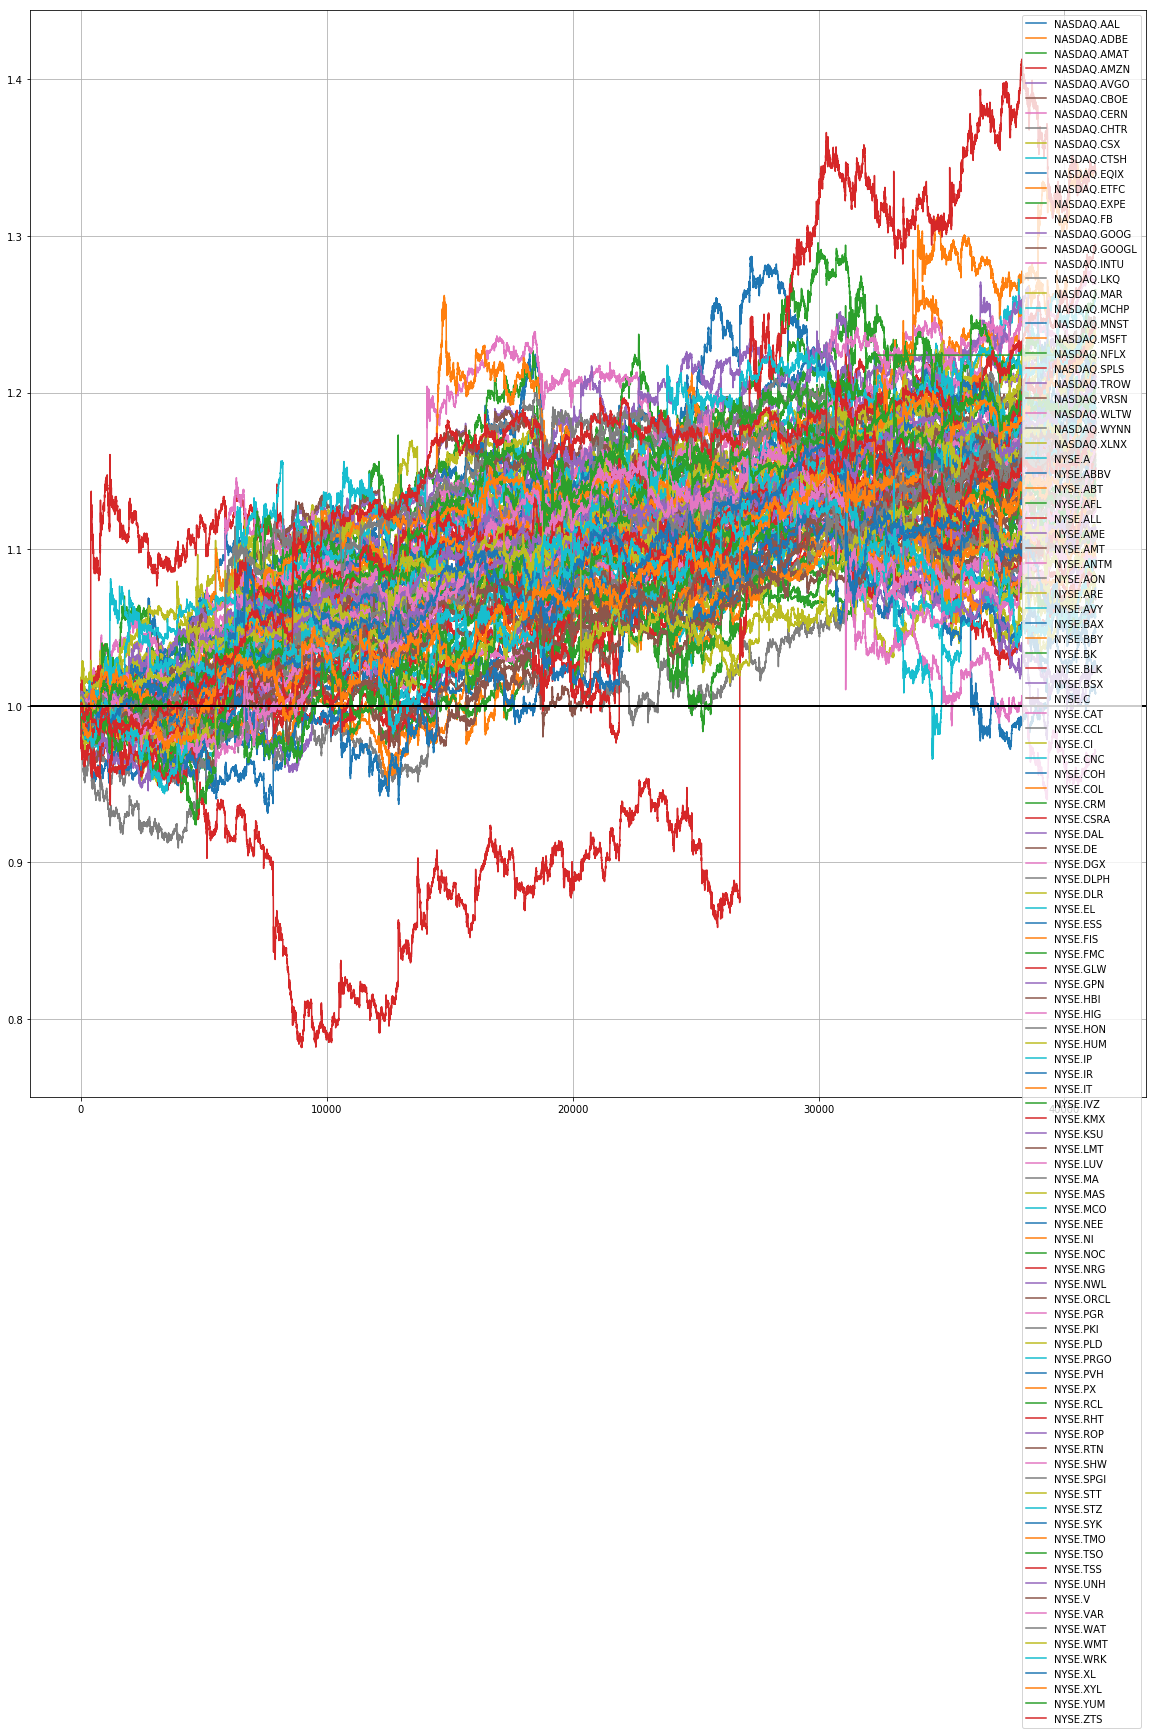

In [188]:
#A slow upward trend is seen
print("Pattern 5 that exists in historical dataset based on fluctuation in price")
stock_return[group5.tolist()].plot(grid = True, figsize = (20, 20)).axhline(y = 1, color = "black", lw = 2)
plt.show()

In [189]:
#Problem Statement 3: Identify which all stocks are moving together and which all stocks are different from each other.
#Print the groups of stocks which are moving together and the remaining stocks would be different from them
list1 = []
for cluster,group in grouped:
    print("Stocks that are moving together in Group: ",cluster)
    list1 = (group['Name'].tolist())
    print(list1) 

Stocks that are moving together in Group:  0
['NASDAQ.AAPL', 'NASDAQ.ADP', 'NASDAQ.ALXN', 'NASDAQ.AMGN', 'NASDAQ.BIIB', 'NASDAQ.CA', 'NASDAQ.CELG', 'NASDAQ.CINF', 'NASDAQ.CMCSA', 'NASDAQ.CME', 'NASDAQ.CTAS', 'NASDAQ.EBAY', 'NASDAQ.EXPD', 'NASDAQ.FISV', 'NASDAQ.FITB', 'NASDAQ.FLIR', 'NASDAQ.GILD', 'NASDAQ.GRMN', 'NASDAQ.HAS', 'NASDAQ.HOLX', 'NASDAQ.HSIC', 'NASDAQ.IDXX', 'NASDAQ.ILMN', 'NASDAQ.JBHT', 'NASDAQ.KLAC', 'NASDAQ.MDLZ', 'NASDAQ.MU', 'NASDAQ.NAVI', 'NASDAQ.NDAQ', 'NASDAQ.NTRS', 'NASDAQ.NWS', 'NASDAQ.NWSA', 'NASDAQ.PCLN', 'NASDAQ.QRVO', 'NASDAQ.SBUX', 'NASDAQ.SNPS', 'NASDAQ.SWKS', 'NASDAQ.TXN', 'NASDAQ.VRSK', 'NASDAQ.WDC', 'NASDAQ.ZION', 'NYSE.ABC', 'NYSE.ACN', 'NYSE.AEE', 'NYSE.AEP', 'NYSE.AES', 'NYSE.AGN', 'NYSE.AIG', 'NYSE.AIV', 'NYSE.AIZ', 'NYSE.AJG', 'NYSE.ALB', 'NYSE.ALLE', 'NYSE.AMG', 'NYSE.AMP', 'NYSE.APD', 'NYSE.APH', 'NYSE.AVB', 'NYSE.AWK', 'NYSE.AXP', 'NYSE.BAC', 'NYSE.BBT', 'NYSE.BDX', 'NYSE.BEN', 'NYSE.BF.B', 'NYSE.BMY', 'NYSE.BRK.B', 'NYSE.BWA', 'NYSE.CB', 'NYSE.CBG